# Principal Component Analysis_Algorithm #

Although *sklearn* provides powerful toolbox for conducting Principle Component Analysis, it is important to understand the math background and algorithm for PCA.  
  
There are several material illustrating the mathematics of PCA, including a detailed *Wikipedia*:   
https://en.wikipedia.org/wiki/Principal_component_analysis  
and a brief introduction:  
https://builtin.com/data-science/step-step-explanation-principal-component-analysis  


For PCA algorithm and its fulfillment in Python, I find these codes on GitHub project quite useful:  
https://github.com/csuldw/MachineLearning/tree/master/PCA  
 
Following codes are parts of it:

## Python PCA Program ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def meanX(dataX):
    '''
    Compute the mean of a np.array by columns
    '''
    return np.mean(dataX,axis=0) # axis=0 for take average by columns

In [86]:
def pca(XMat, k):
    '''
    Parameters：
        - XMat：A (m*n) array of raw data, where each row is a sample and each column is a feature. 
        - k：The number of principle components. We take k eigenvalues and eigenvectors.
    Return：
        - finalData：Low dimension matrix generated from the PCA algorithm.
    '''
    X = np.array(XMat)
    m, n = np.shape(XMat)
    
    if k > n:
        print('Error: k must lower than the number of features') 
    
    else:
        average = meanX(X) 

        avgs = np.tile(average, (m, 1))
        data_adjust = X - avgs
    
        covX = np.cov(data_adjust.T)   # Covariance matrix 
        featValue, featVec=  np.linalg.eig(covX)  # Solve the eigenvalues and eigenvectors of the covariance matrix
        index = np.argsort(-featValue) # Sort the eigenvalues from the largest to the smallest

        selectVec = np.array(featVec.T[index[:k]])
        finalData = np.array(data_adjust @ selectVec.T)
        
        return finalData


**We can use the data of breast cancer in Wisconsin provided by**  ***sklearn*** **to test the performance of our PCA function.**

In [87]:
# Import data of breast cancer in Wisconsin
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

# PCA using our function
finalData = pca(scaled_data, 2) # Compress the diamension from 30 to 2
finalData.shape

(569, 2)

Finding: As we can see, the PCA function successfully decreases the diamension from 30 to 2.

Text(0, 0.5, 'Second Principal Component')

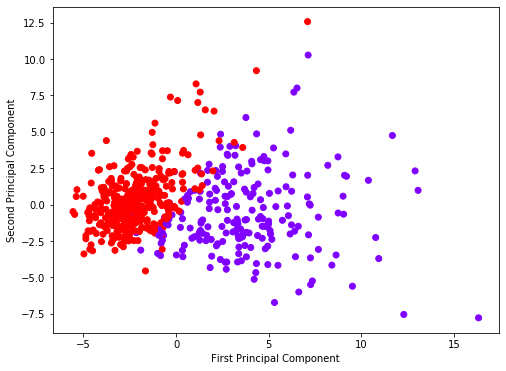

In [88]:
# Plot the 
plt.figure(figsize=(8,6))
plt.scatter(finalData[:,0],finalData[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

**Compare to the result using PCA function provided by** ***sklearn.***

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # We specify the number of components as 2
pca.fit(scaled_data)

finalDataTest = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

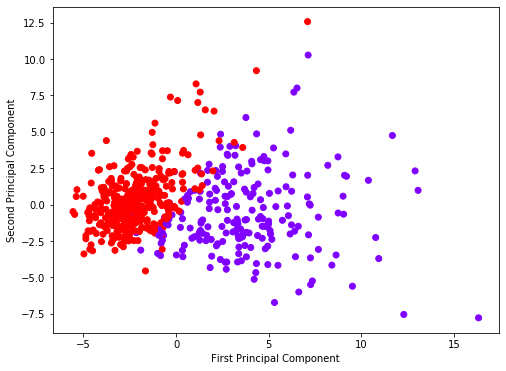

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(finalDataTest[:,0],finalDataTest[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Finding: As we can see, the our PCA function gives same result with the PCA function provided by *sklearn*.